# Aufgabe 2: Multi-Class Perceptrons

In [161]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs #for data generatio
from sklearn.preprocessing import OneHotEncoder

In [162]:
X, y = make_blobs(n_samples=50, centers=3, cluster_std=0.2,n_features=2,center_box=(1,5),random_state=104)

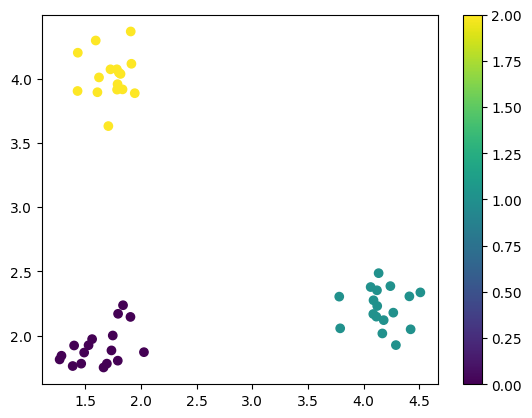

In [163]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.colorbar()

### draw Percepton layout
* Hint: now we have more then one Perceptron
* write math. formulation as linear model

In [164]:
#z1 = w1*x+b1 = -1 * x1 - 1.1 * x2 + 5
#z2 = w2*x+b2 = 1 * x1 - 1 * x2 -1
#z3 = w3*x+b3 = 0 * x1 + 1 * x2 -3


### Transform lables to one-hot coding
* Hint: Use Scikit-Learn

In [165]:
enc = OneHotEncoder(handle_unknown='ignore')
y_encoded = enc.fit_transform(y.reshape(-1,1)).toarray()
y_encoded[y_encoded == 0] = -1
y_encoded

array([[ 1., -1., -1.],
       [-1.,  1., -1.],
       [-1., -1.,  1.],
       [-1.,  1., -1.],
       [-1., -1.,  1.],
       [-1., -1.,  1.],
       [-1.,  1., -1.],
       [ 1., -1., -1.],
       [-1., -1.,  1.],
       [-1., -1.,  1.],
       [ 1., -1., -1.],
       [-1., -1.,  1.],
       [ 1., -1., -1.],
       [-1.,  1., -1.],
       [-1.,  1., -1.],
       [ 1., -1., -1.],
       [ 1., -1., -1.],
       [-1.,  1., -1.],
       [-1.,  1., -1.],
       [ 1., -1., -1.],
       [-1., -1.,  1.],
       [-1.,  1., -1.],
       [-1., -1.,  1.],
       [-1.,  1., -1.],
       [-1.,  1., -1.],
       [-1.,  1., -1.],
       [ 1., -1., -1.],
       [-1.,  1., -1.],
       [-1., -1.,  1.],
       [-1.,  1., -1.],
       [-1., -1.,  1.],
       [ 1., -1., -1.],
       [ 1., -1., -1.],
       [-1.,  1., -1.],
       [-1., -1.,  1.],
       [-1., -1.,  1.],
       [-1., -1.,  1.],
       [ 1., -1., -1.],
       [-1., -1.,  1.],
       [ 1., -1., -1.],
       [ 1., -1., -1.],
       [-1., -1.

### Manually find parameters $w$ and $b$ for
* for each Perceptron seperately
* then combine to single matrix multiplication formulation

In [166]:
def plot_line_from_normal_vector_and_offset(normal_vector, offset, x_range=None, ax=None, **kwargs):
    """
    Plots a 2D line defined by its normal vector w and offset b such that wx + b = 0.

    Args:
        normal_vector (list or numpy.ndarray): A 2D vector representing the normal to the line (w). Must be of length 2.
        offset (float): The offset (b) such that w.x + b = 0.
        x_range (tuple, optional): A tuple (xmin, xmax) specifying the range of x-values to plot.
                                     If None (default), a reasonable range is automatically determined.
        ax (matplotlib.axes._axes.Axes, optional): The matplotlib axes object to plot on. If None (default),
                                                  the current axes (plt.gca()) is used, or a new figure and axes
                                                  are created.
        **kwargs: Keyword arguments to pass to the `plot` function (e.g., color, linestyle, linewidth).

    Returns:
        matplotlib.lines.Line2D: The line object created by `ax.plot`.
    """
    normal_vector = np.array(normal_vector)  # Ensure it's a NumPy array for calculations

    if normal_vector.shape != (2,):
        raise ValueError("Normal vector must be a 2D vector (length 2).")

    w1, w2 = normal_vector

    if ax is None:
        fig, ax = plt.subplots()

    if x_range is None:
        # Determine a reasonable x-range
        xmin = -5
        xmax = 5
        x_range = (xmin, xmax)

    xmin, xmax = x_range
    x = np.linspace(xmin, xmax, 100)  # Generate x-values

    if w2 != 0:
        y = (-w1 * x - offset) / w2  # Solve for y: w1*x + w2*y + b = 0  =>  y = (-w1*x - b) / w2
    else:
        # Handle the case where the line is vertical (w2=0). Plot a vertical line.
        if w1 == 0:
            raise ValueError("Cannot plot line with w1=0 and w2=0.")
        x = np.full_like(x, -offset / w1)  # x is constant for a vertical line
        y = np.linspace(ax.get_ylim()[0], ax.get_ylim()[1], 100)  # generate y values spanning the current y-axis.



    line, = ax.plot(x, y, **kwargs)

    return line

<ipython-input-167-6bfc2790702d>:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


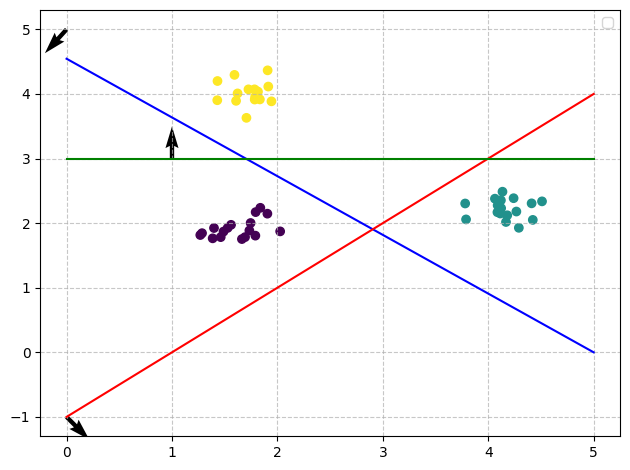

In [167]:
plt.figure()

w1=np.array([-1,-1.1])
b1=5
w2=np.array([1,-1])
b2=-1
w3=np.array([0,1])
b3=-3

line1 = plot_line_from_normal_vector_and_offset(w1, b1, color='blue',x_range=[0,5],ax=plt)
line2 = plot_line_from_normal_vector_and_offset(w2, b2, color='red',x_range=[0,5],ax=plt)
line3 = plot_line_from_normal_vector_and_offset(w3, b3, color='green',x_range=[0,5],ax=plt)


plt.scatter(X[:,0],X[:,1],c=y)

plt.legend()
plt.quiver(0,b1,w1[0],w1[1])
plt.quiver(0,b2,w2[0],w2[1])
plt.quiver(1,3,w3[0],w3[1])
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### test single perceptrons by class


In [168]:

W = np.array([w1, w2, w3])
b = np.array([b1,b2,b3]).reshape(3, 1)


In [169]:
i=0
print(W.dot(X[i,:].T)+b)
print (y_encoded[i],np.sign(W.dot(X[i,:].T)+b))
y_encoded[i]==np.sign(W.dot(X[i,:].T)+b)


[[ 1.26836416  4.58624567  6.97399532]
 [-4.73163584 -1.41375433  0.97399532]
 [-6.73163584 -3.41375433 -1.02600468]]
[ 1. -1. -1.] [[ 1.  1.  1.]
 [-1. -1.  1.]
 [-1. -1. -1.]]


array([[ True, False, False],
       [False,  True, False],
       [False,  True,  True]])

#### test full Setup

In [170]:
predicts = W.dot(X.T)+b
y_encoded==np.sign(predicts).T


array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ T

In [171]:
pred_signs = np.sign(predicts).T  # Transpose to (50, 3)

# Compare with y_encoded (ensure shapes match)
misclassified = (y_encoded != pred_signs)

# Print misclassified points
print("Misclassified Points:")
for i in range(len(misclassified)):
    if misclassified[i].any():
        print(f"Point {i}: X = {X[i]}, True = {y_encoded[i]}, Pred = {pred_signs[i]}")

Misclassified Points:


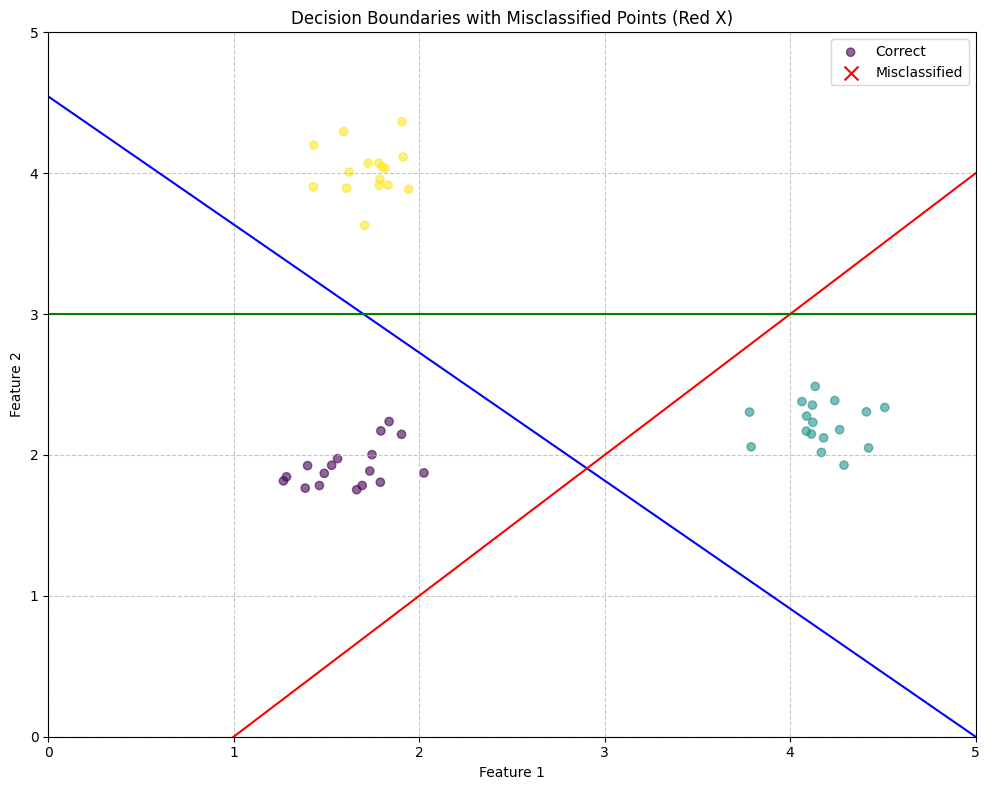

In [172]:
plt.figure(figsize=(10, 8))
y_pred = (predicts > 0).astype(int).T
misclassified = (y_pred[:, 0] == y)
# Plot all points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', alpha=0.6, label='Correct')

# Highlight misclassified points
plt.scatter(X[misclassified, 0], X[misclassified, 1],
            c='red', marker='x', s=100, label='Misclassified')
line1 = plot_line_from_normal_vector_and_offset(w1, b1, color='blue',x_range=[0,5],ax=plt)
line2 = plot_line_from_normal_vector_and_offset(w2, b2, color='red',x_range=[0,5],ax=plt)
line3 = plot_line_from_normal_vector_and_offset(w3, b3, color='green',x_range=[0,5],ax=plt)

# Add labels and legend
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundaries with Misclassified Points (Red X)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.tight_layout()

## Add non-linear activation / loss -> $softmax$
* implement a $softmax$ function
* replace $sgn$ by $softmax$
* plot confidence of the test samples

In [173]:
def softmax(x):
    x = np.array(x)
    exp_x = np.exp(x - np.max(x))
    return exp_x / np.sum(exp_x)

predicts_softmax = softmax(predicts).T
print("Confidence of test sampels:", predicts_softmax)

Confidence of test sampels: [[0.01959026 0.00134033 0.00197519]
 [0.00102666 0.0109278  0.00296115]
 [0.00273775 0.000296   0.01034964]
 [0.00192219 0.01145524 0.00214789]
 [0.00165307 0.0001941  0.01608892]
 [0.00196407 0.00018644 0.01510813]
 [0.00078521 0.01663794 0.00275405]
 [0.01110434 0.00135973 0.00257063]
 [0.0022612  0.00020624 0.01346479]
 [0.00185307 0.00024115 0.01374125]
 [0.02664993 0.00147072 0.00163216]
 [0.00176088 0.00025276 0.01376748]
 [0.01147882 0.00159203 0.00234726]
 [0.00104289 0.01634491 0.00242636]
 [0.00112053 0.01242734 0.00267162]
 [0.01813532 0.00174136 0.00180899]
 [0.03120917 0.00117247 0.00168645]
 [0.00113822 0.01343127 0.00255546]
 [0.00084878 0.01053838 0.00329848]
 [0.02115812 0.00185173 0.00163247]
 [0.00156069 0.00020552 0.01609166]
 [0.00085324 0.01295192 0.00298252]
 [0.00147517 0.00013585 0.02013114]
 [0.00147809 0.00887818 0.0027482 ]
 [0.00121227 0.01589051 0.00228909]
 [0.00134448 0.02153154 0.0018855 ]
 [0.01577617 0.001569   0.00203148]


In [174]:
pred_signs = softmax(predicts).T  # Transpose to (50, 3)


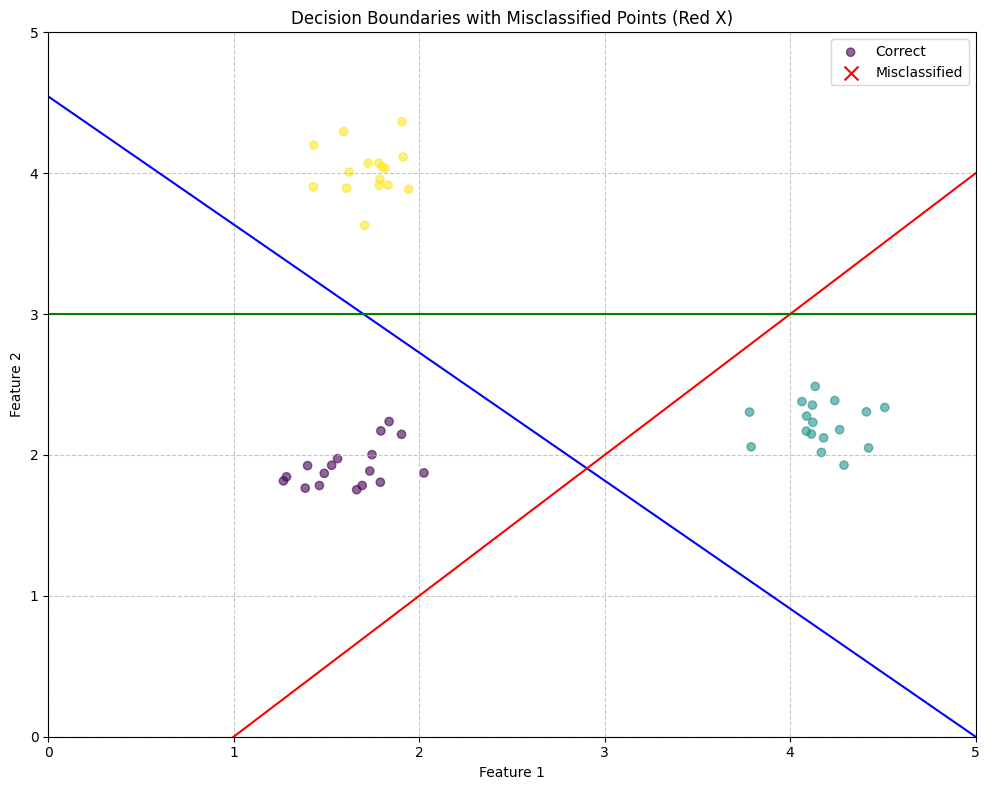

In [175]:
plt.figure(figsize=(10, 8))
y_pred = (predicts > 0).astype(int).T
misclassified = (y_pred[:, 0] == y)
# Plot all points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', alpha=0.6, label='Correct')

# Highlight misclassified points
plt.scatter(X[misclassified, 0], X[misclassified, 1],
            c='red', marker='x', s=100, label='Misclassified')
line1 = plot_line_from_normal_vector_and_offset(w1, b1, color='blue',x_range=[0,5],ax=plt)
line2 = plot_line_from_normal_vector_and_offset(w2, b2, color='red',x_range=[0,5],ax=plt)
line3 = plot_line_from_normal_vector_and_offset(w3, b3, color='green',x_range=[0,5],ax=plt)

# Add labels and legend
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundaries with Misclassified Points (Red X)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.tight_layout()